# Data Cleansing

**Handle Missing Values**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
df = pd.read_csv("in-vehicle-coupon-recommendation.csv")

In [3]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [4]:
df.shape

(12684, 26)

In [5]:
#drop unnecessary column
df = df.drop(columns=['car', 'toCoupon_GEQ5min', 'direction_opp'])

In [6]:
df[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']].describe()

,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12577,12467,12533,12554,12495
unique,5,5,5,5,5
top,never,less1,1~3,1~3,less1
freq,5197,3385,4672,5376,6077


In [7]:
#imputation using mode or most frequent value
df = df.fillna(df.mode().iloc[0])

In [8]:
df[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']].describe()

,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12684,12684,12684,12684,12684
unique,5,5,5,5,5
top,never,less1,1~3,1~3,less1
freq,5304,3602,4823,5506,6266


In [9]:
df.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
Y                       0
dtype: int64

**Handle Duplicated Data**

In [10]:
df.duplicated().sum()

74

In [11]:
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(12610, 23)

Duplicated data is dropped/deleted, this is done so that the row variation is high so that the train data for the machine learning model is more accurate.

**Handle Outliers**

In [14]:
pd.set_option('display.max_columns', None)
df.describe(include='all')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
count,12610,12610,12610,12610.000000,12610,12610,12610,12610,12610,12610,12610.000000,12610,12610,12610,12610,12610,12610,12610,12610,12610.000000,12610.000000,12610.000000,12610.000000
unique,3,4,3,NaN,5,5,2,2,8,5,NaN,6,25,9,5,5,5,5,5,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,1d,Female,21,Married partner,NaN,Some college - no degree,Unemployed,$25000 - $37499,never,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN
freq,6266,7248,10011,NaN,3220,3989,7031,6469,2642,5068,NaN,4325,1861,2006,5285,3579,4795,5485,6230,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.267248,NaN,NaN,NaN,NaN,NaN,NaN,0.414512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.559794,0.116019,0.215543,0.567565
std,NaN,NaN,NaN,19.153386,NaN,NaN,NaN,NaN,NaN,NaN,0.492657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496432,0.320260,0.411215,0.495434
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000


no outlier handling is performed because the data type in each feature is categorical, so there are no extreme values, apart from that the values ​​are still reasonable for further processing.

**Feature Transformation**

In [15]:
df['age'].value_counts()

age
21         2642
26         2548
31         2019
50plus     1781
36         1317
41         1089
46          670
below21     544
Name: count, dtype: int64

In [16]:
#categorize it to be more simple
age_list = []
for i in df['age']:
    if i == 'below21':
        age = '<21'
    elif i == '21' or i == '26':
        age = '21-30'
    elif i == '31' or i == '36':
        age = '31-40'
    elif i == '41' or i == '46':
        age = '41-50'
    else:
        age = '>50'
    age_list.append(age)
df['age'] = age_list

In [17]:
#checking new age unique value
df['age'].value_counts()

age
21-30    5190
31-40    3336
>50      1781
41-50    1759
<21       544
Name: count, dtype: int64

In [18]:
pd.set_option('display.max_columns', None)
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21-30,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21-30,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21-30,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21-30,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21-30,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0


**Feature Encoding**

In [19]:
df_dummy = df.copy()

In [20]:
#label encoding proccess
df_le = df_dummy.replace({'expiration':{'2h': 0, '1d' : 1},
                    'gender':{'Male': 0, 'Female' : 1},
                    'age':{'<21': 0, '21-30': 1, '31-40': 2, '41-50': 3, '>50': 4},
                    'education':{'Some High School': 0, 'High School Graduate': 1, 'Some college - no degree': 2, 'Associates degree': 3, 'Bachelors degree': 4, 'Graduate degree (Masters or Doctorate)': 5},
                    'Bar':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
                    'CoffeeHouse':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}, 
                    'CarryAway':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}, 
                    'RestaurantLessThan20':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}, 
                    'Restaurant20To50':{'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
                    'temperature':{30: 0, 55: 1, 80: 2},
                    'income':{'Less than $12500':0, '$12500 - $24999':1, '$25000 - $37499':2, '$37500 - $49999':3, '$50000 - $62499':4, '$62500 - $74999':5, '$75000 - $87499':6, '$87500 - $99999':7, '$100000 or More':8},
                    'time':{'7AM':0, '10AM':1, '2PM':2, '6PM':3, '10PM':4}})

C:\Users\Abinsaj Farsana\AppData\Local\Temp\ipykernel_11324\1102641051.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_le = df_dummy.replace({'expiration':{'2h': 0, '1d' : 1},


In [21]:
#one hot encoding process
ohe_cat = ['destination', 'passanger', 'maritalStatus', 'occupation', 'coupon', 'weather']
df_ohe_cat = pd.get_dummies(df_dummy[ohe_cat], columns=ohe_cat)

In [22]:
#merging label encoding columns and one hot encoding columns
df_encode = pd.concat([df_ohe_cat, df_le], axis = 1)
df_encode = df_encode.drop(columns=['destination', 'passanger', 'maritalStatus', 'occupation', 'coupon', 'weather'])

In [23]:
df_encode.head()

,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),weather_Rainy,weather_Snowy,weather_Sunny,temperature,time,expiration,gender,age,has_children,education,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,1,2,1,1,1,1,2,3,0,0,2,3,2,0,0,0,1
1,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,2,1,0,1,1,1,2,3,0,0,2,3,2,0,0,0,0
2,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,2,1,0,1,1,1,2,3,0,0,2,3,2,1,0,0,1
3,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,2,2,0,1,1,1,2,3,0,0,2,3,2,1,0,0,0
4,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,2,2,1,1,1,1,2,3,0,0,2,3,2,1,0,0,0


In [24]:
df_encode.shape

(12610, 62)

**Handle Class Imbalance**

In [25]:
df_y_gb = df.groupby('Y').agg({'destination':'count'}).reset_index()
df_y_gb['total_customer'] = df_y_gb['destination'].sum()
df_y_gb.rename(columns={'destination':'customers'}, inplace=True)
df_y_gb['percentage'] = round((df_y_gb['customers']/df_y_gb['total_customer'])*100, 2)
df_y_gb

,Y,customers,total_customer,percentage
0,0,5453,12610,43.24
1,1,7157,12610,56.76


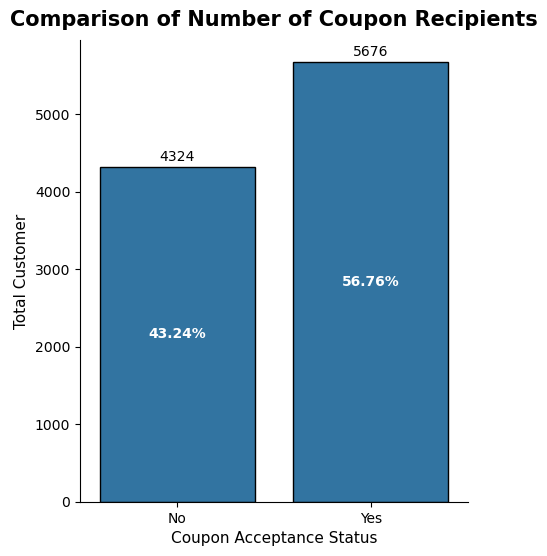

In [6]:
data = {
    'Y': ['No', 'Yes'],
    'customers': [4324, 5676]}
df_y_gb = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(5, 6))
plt.title("Comparison of Number of Coupon Recipients", fontsize=15, color='black', weight='bold', pad=10)
sns.barplot(x='Y', y='customers', data=df_y_gb, edgecolor='black')
plt.xlabel('Coupon Acceptance Status', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.xticks([0, 1], ['No', 'Yes'])
bar_container = ax.containers[0]  # Get the bar container
plt.bar_label(bar_container, padding=2)  # Add padding to the first label
plt.bar_label(bar_container, ['43.24%', '56.76%'], label_type='center', color='white', weight='bold')
sns.despine()
plt.savefig('coupon_recipient.png')
plt.show()

Based on the calculation of the ratio value of the two target classes that received coupons and did not receive coupons, namely 57:43, there is no need to handle class imbalance because the target comparison value is not extreme.

# Feature Engineering

**Feature Selection**

In [27]:
df = df.astype('object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  object
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  object
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null  obj

In [36]:
pip install dython

  Attempting uninstall: psutil
    Found existing installation: psutil 5.9.0
    Uninstalling psutil-5.9.0:
      Successfully uninstalled psutil-5.9.0
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.


In [39]:
import pandas as pd
from dython.nominal import associations

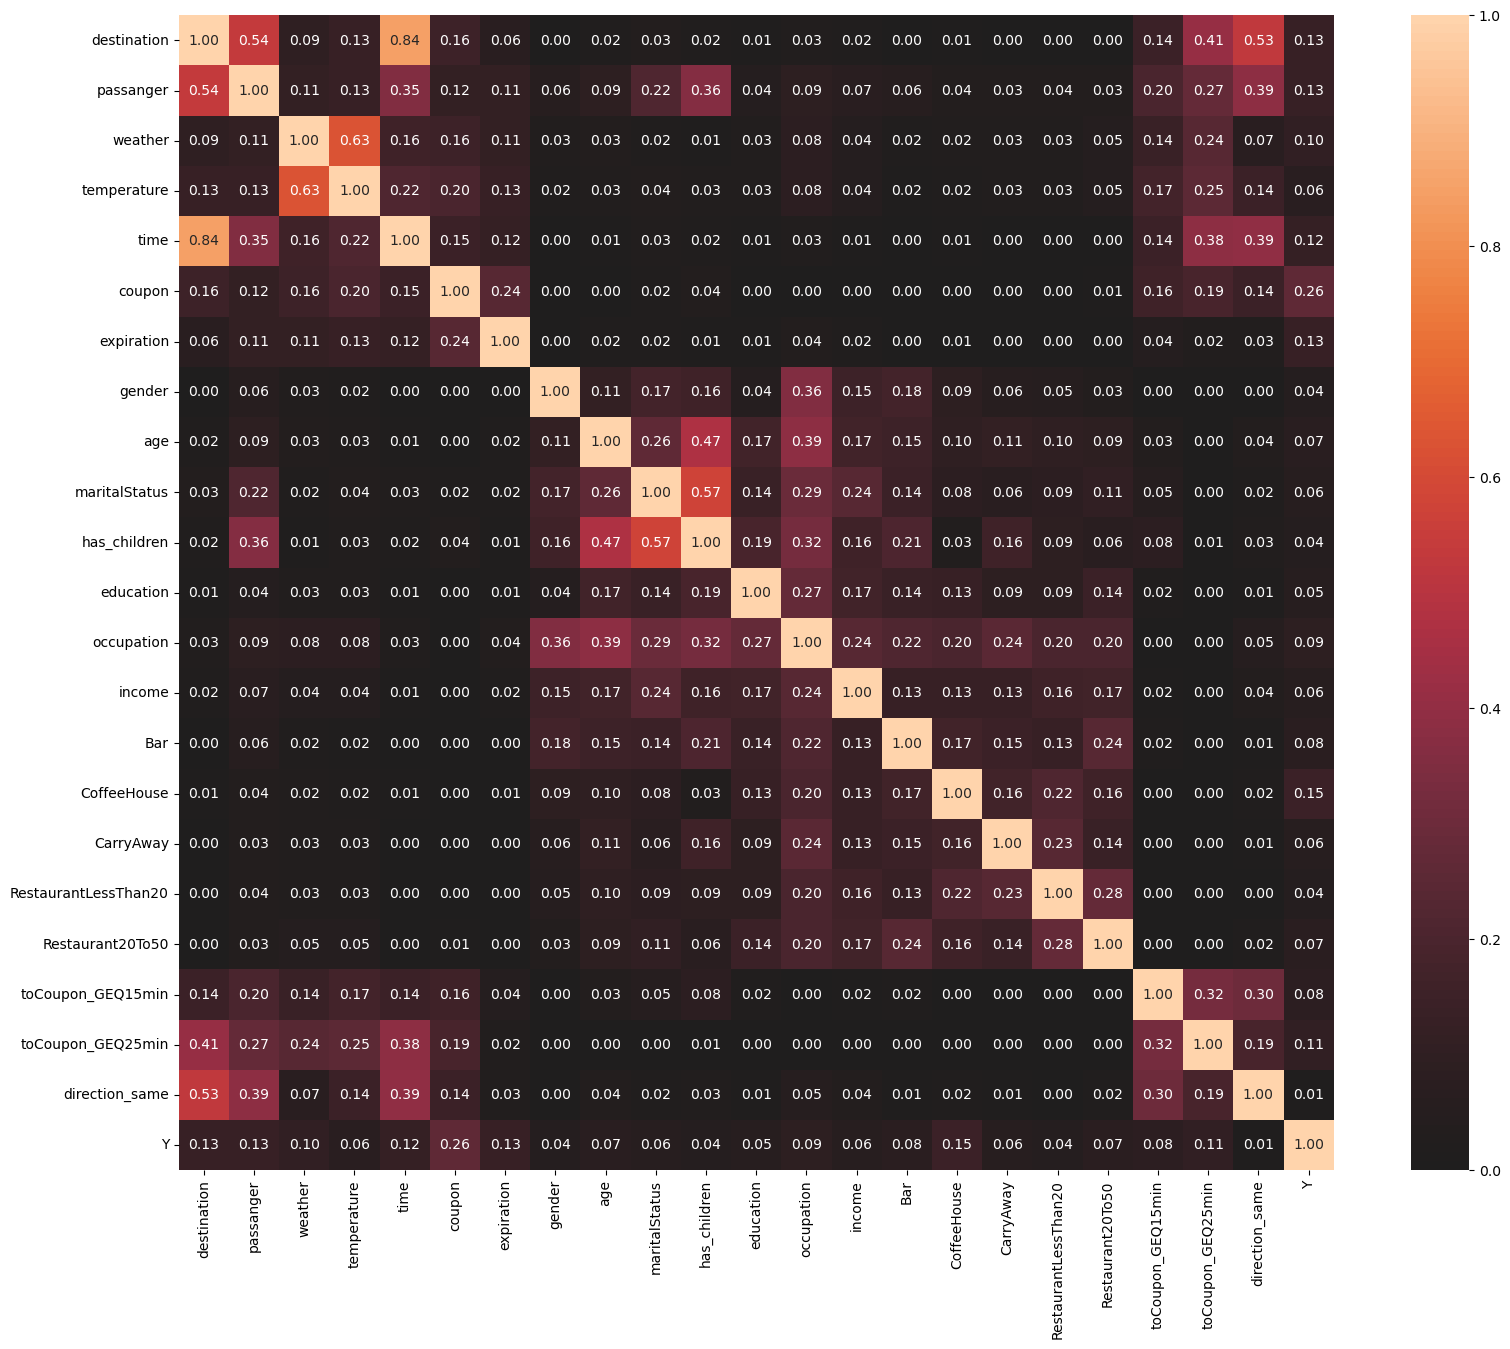

In [40]:
fig, ax = plt.subplots(figsize=(20, 15))
associations(df, nom_nom_assoc='cramer', ax=ax)
fig.savefig('fs_dython.png')

In [42]:
pip install featurewiz

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 1.5 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 1.7 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/376.0 MB 672.2 kB/s eta 0:09:19
   ---------------------------------------- 0.8/376.0 MB 730.2 kB/s eta 0:08:34
   ---------

In [43]:
import pandas as pd
from featurewiz import featurewiz

Imported lazytransform v1.18. 

Imported featurewiz 0.6.1. Use the following syntax:
    >>> wiz = FeatureWiz(feature_engg = '', nrows=None, transform_target=True,
        		category_encoders="auto", auto_encoders='VAE', ae_options={},
        		add_missing=False, imbalanced=False, verbose=0)
    >>> X_train_selected, y_train = wiz.fit_transform(X_train, y_train)
    >>> X_test_selected = wiz.transform(X_test)
    >>> selected_features = wiz.features
    


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.8 as the correlation limit. Change this limit to fit your needs...
    Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
    Single_Label Binary_Classification problem 
    Loaded train data. Shape = (12610, 23)
    Single_Label Binary_Classification problem 
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
    Single_Label Binary_Classification problem 
    loading a random sample of 10000 rows into pandas for EDA
##########################################

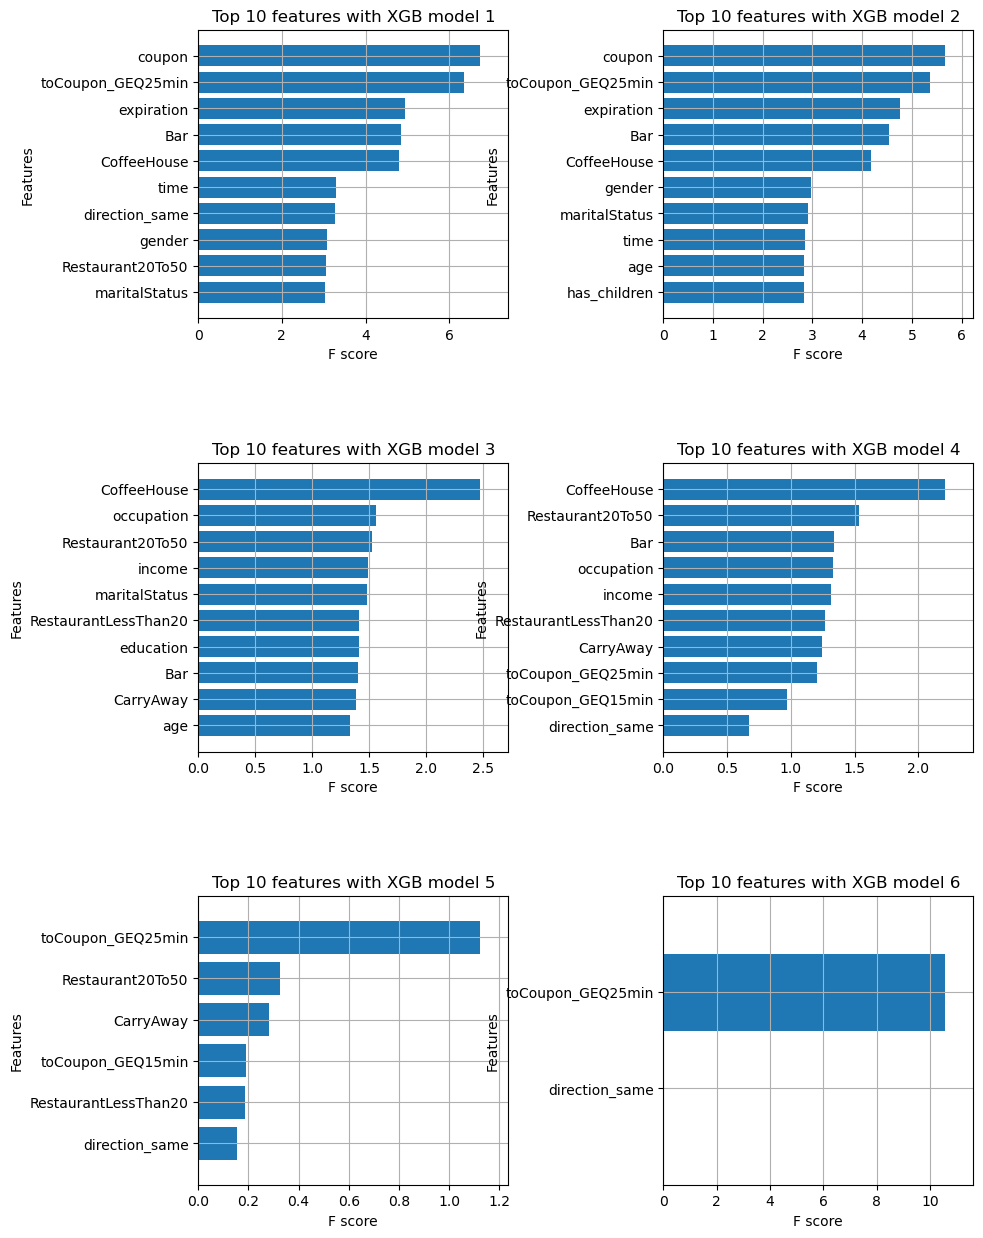

    Completed XGBoost feature selection in 6 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 14 important features:
['coupon', 'occupation', 'CoffeeHouse', 'Bar', 'income', 'time', 'education', 'age', 'Restaurant20To50', 'toCoupon_GEQ25min', 'CarryAway', 'RestaurantLessThan20', 'toCoupon_GEQ15min', 'direction_same']
Total Time taken for featurewiz selection = 6 seconds
Output contains a list of 14 important features and a train dataframe


In [44]:
features = featurewiz(df, target='Y', verbose=2)

In [45]:
features

(['coupon',
  'occupation',
  'CoffeeHouse',
  'Bar',
  'income',
  'time',
  'education',
  'age',
  'Restaurant20To50',
  'toCoupon_GEQ25min',
  'CarryAway',
  'RestaurantLessThan20',
  'toCoupon_GEQ15min',
  'direction_same'],
        coupon  occupation  CoffeeHouse  Bar  income  time  education  age  \
 0           4          24            4    4       3     2          5    0   
 1           2          24            4    4       3     0          5    0   
 2           1          24            4    4       3     0          5    0   
 3           2          24            4    4       3     2          5    0   
 4           2          24            4    4       3     2          5    0   
 5           4          24            4    4       3     3          5    0   
 6           1          24            4    4       3     2          5    0   
 7           4          24            4    4       3     0          5    0   
 8           1          24            4    4       3     0          

**Feature Extraction**

In [50]:
df_extract = df_dummy.copy()

In [51]:
df_dummy['occupation'].value_counts()

Unemployed                                   1861
Student                                      1575
Computer & Mathematical                      1390
Sales & Related                              1088
Education&Training&Library                    939
Management                                    821
Office & Administrative Support               638
Arts Design Entertainment Sports & Media      627
Business & Financial                          543
Retired                                       493
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   239
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            174
Life Physical Social Science                  169


In [53]:
occupation_list = []
for i in df['occupation']:
    if i == 'Installation Maintenance & Repair' or i == 'Transportation & Material Moving' or i == 'Food Preparation & Serving Related' or i == 'Building & Grounds Cleaning & Maintenance':
        occupation = 'Crafts'
    elif i == 'Architecture & Engineering' or i == 'Education&Training&Library' or i == 'Healthcare Practitioners & Technical' or i == 'Management' or i == 'Arts Design Entertainment Sports & Media' or i == 'Computer & Mathematical' or i == 'Legal' or i == 'Business & Financial':
        occupation = 'Professionals'
    elif i == 'Retired':
        occupation = 'Retired'
    elif i == 'Sales & Related' or i == 'Personal Care & Service' or i == 'Protective Service':
        occupation = 'Service and sales'
    elif i == 'Student':
        occupation = 'Student'
    elif i == 'Healthcare Support' or i == 'Life Physical Social Science' or i == 'Community & Social Services' or i == 'Construction & Extraction':
        occupation = 'Technicians'
    elif i == 'Unemployed':
        occupation = 'Unemployed'
    else:
        occupation = 'Others'
    occupation_list.append(occupation)
df_extract['occupation'] = occupation_list

In [54]:
#checking occupation unique value
df_extract['occupation'].value_counts()

Professionals        4958
Unemployed           1861
Student              1575
Service and sales    1437
Technicians           804
Others                789
Crafts                693
Retired               493
Name: occupation, dtype: int64

In [55]:
df_extract['passanger_destination'] = df_extract['passanger'].astype(str) + '-' + df_extract['destination'].astype(str)
df_extract['marital_hasChildren'] = df_extract['maritalStatus'].astype(str) + '-' + df_extract['has_children'].astype(str)
df_extract['temperature_weather'] = df_extract['temperature'].astype(str) + '-' + df_extract['weather'].astype(str)

In [56]:
df_extract = df_extract.drop(columns=['passanger', 'destination', 'maritalStatus', 'has_children', 'temperature','weather'])

In [57]:
df_extract.head()

,time,coupon,expiration,gender,age,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y,passanger_destination,marital_hasChildren,temperature_weather
0,2PM,Restaurant(<20),1d,Female,21-30,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,1,Alone-No Urgent Place,Unmarried partner-1,55-Sunny
1,10AM,Coffee House,2h,Female,21-30,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,0,Friend(s)-No Urgent Place,Unmarried partner-1,80-Sunny
2,10AM,Carry out & Take away,2h,Female,21-30,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1,Friend(s)-No Urgent Place,Unmarried partner-1,80-Sunny
3,2PM,Coffee House,2h,Female,21-30,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,Friend(s)-No Urgent Place,Unmarried partner-1,80-Sunny
4,2PM,Coffee House,1d,Female,21-30,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,Friend(s)-No Urgent Place,Unmarried partner-1,80-Sunny


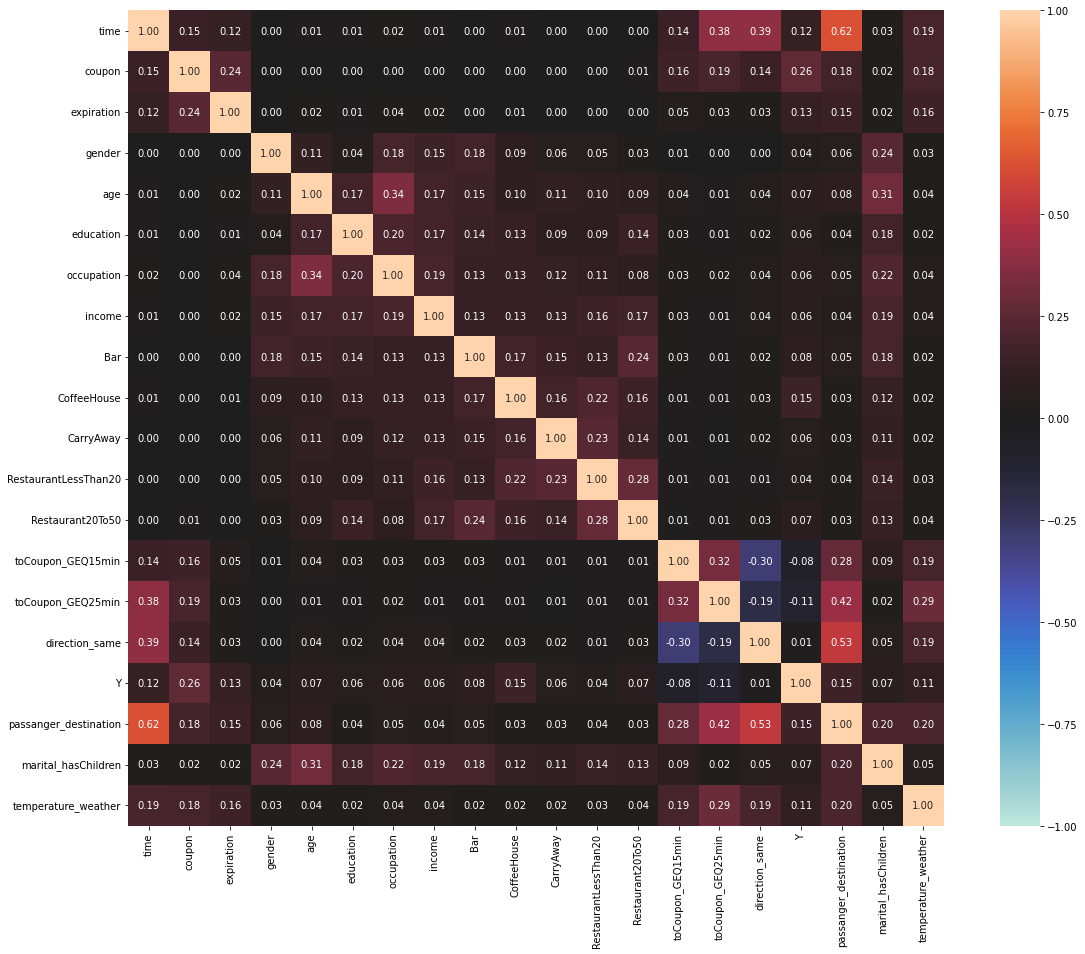

{'corr':                            time    coupon  expiration    gender       age  \
 time                   1.000000  0.145076    0.122493  0.000000  0.013941   
 coupon                 0.145076  1.000000    0.236730  0.000000  0.000000   
 expiration             0.122493  0.236730    1.000000  0.000000  0.021654   
 gender                 0.000000  0.000000    0.000000  1.000000  0.114030   
 age                    0.013941  0.000000    0.021654  0.114030  1.000000   
 education              0.011139  0.000000    0.008719  0.040181  0.169781   
 occupation             0.022336  0.000000    0.036855  0.183546  0.344254   
 income                 0.011982  0.000000    0.020355  0.151196  0.165255   
 Bar                    0.000000  0.000000    0.000000  0.175968  0.150146   
 CoffeeHouse            0.012379  0.000000    0.007679  0.092495  0.098032   
 CarryAway              0.000000  0.000000    0.000000  0.056911  0.113623   
 RestaurantLessThan20   0.002411  0.000000    0.000938  

In [58]:
associations(df_extract, nom_nom_assoc='cramer', figsize=(20, 15))

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (12610, 20)
    Loaded train data. Shape = (12610, 20)
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Binary_Classification problem ####
    loading a random sample of 10000 rows into pandas for EDA
#######################################################################################
################

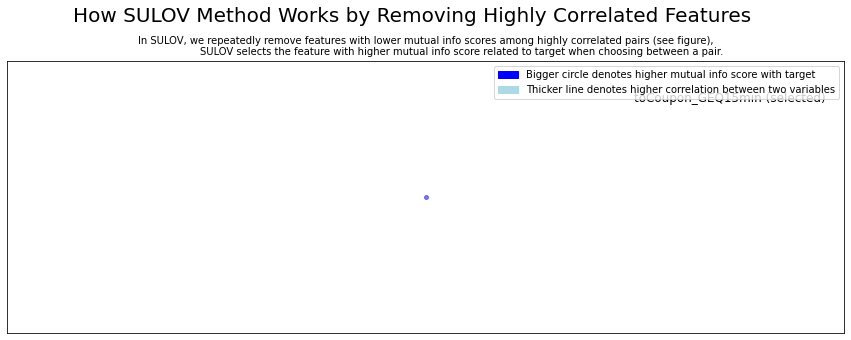

Time taken for SULOV method = 3 seconds
    Adding 16 categorical variables to reduced numeric variables  of 3
Final list of selected vars after SULOV = 19
Readying dataset for Recursive XGBoost by converting all features to numeric...
    there were no mixed data types or object columns that errored. Data is all numeric...
Shape of train data after pruning = (12610, 20)
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 19 
    XGBoost version: 1.6.1
Number of booster rounds = 100
        using 19 variables...
            Time taken for regular XGBoost feature selection = 0 seconds
        using 15 variables...
            Time taken fo

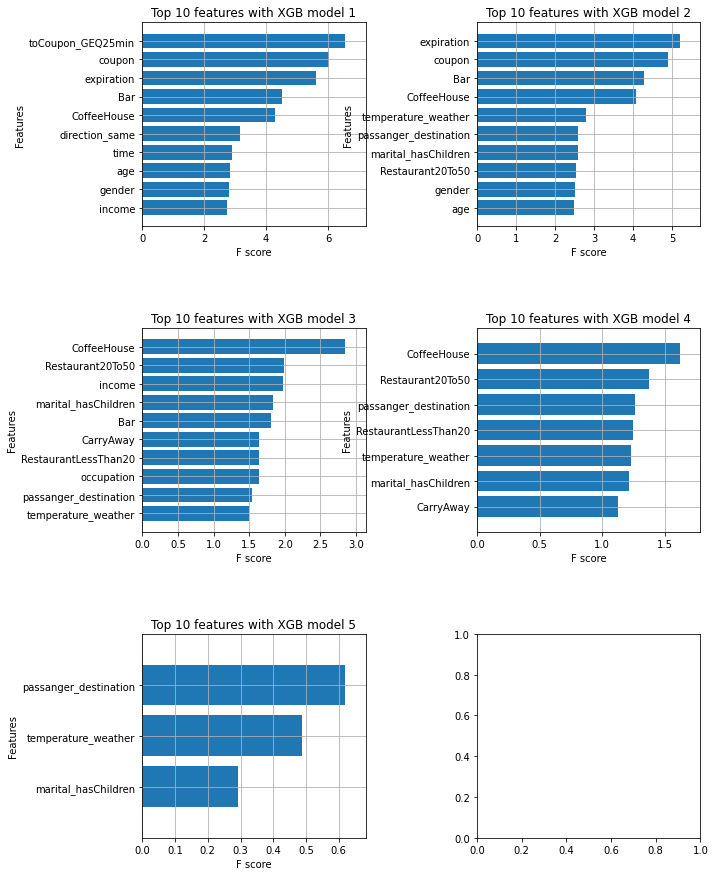

            Total time taken for XGBoost feature selection = 3 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 17 important features:
['toCoupon_GEQ25min', 'coupon', 'expiration', 'Bar', 'CoffeeHouse', 'direction_same', 'time', 'age', 'gender', 'income', 'temperature_weather', 'passanger_destination', 'marital_hasChildren', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'occupation']

    Time taken for feature selection = 6 seconds
    Reverted column names to original names given in train dataset


In [59]:
features = featurewiz(df_extract, target='Y', verbose=2)

**Feature Addition**

**1. Operating System GPS mobil/handphone**

The operating system referred to here is the latest system update version of the cellphone which can affect the GPS feature and influence coupon acceptance.


**2. Design E-Coupon**

An attractive e-coupon design will increase the desire of drivers to accept the coupon.

**3. Platform Email User**

By knowing the user's email, promotions can be carried out for each user and can be identified to be more precise in providing coupons so that the coupons received will also increase.


**4. Internet Service Provider**

Differences in signals and internet service providers will affect the speed of opening GPS and with different internet service providers, the promotions given will also be different.